In [2]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.cs
Iris=pd.read_csv(r'C:\Users\hp\Downloads\iris.csv')
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
Iris.shape

(150, 5)

In [4]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris=Iris.iloc[0:100,:]
Iris.shape
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [5]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
for i,v in enumerate(Iris.loc[:,'species'].values):
    if(v=='setosa'):
        Iris.loc[i,'species']=0;
    else:
        Iris.loc[i,'species']=1;
        

In [17]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


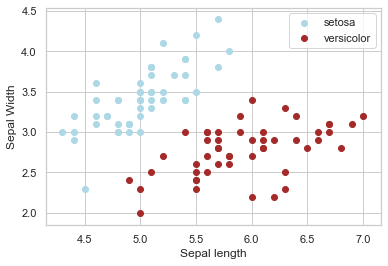

In [6]:
#visualization of given dataset
#codesegment4------------------
for i,v in enumerate(Iris.loc[:,'species'].values):
    if(v==1):
        break
plt.scatter(Iris.loc[0:i,'sepal_length'],Iris.loc[0:i,'sepal_width'],c='lightblue',label='setosa')
plt.scatter(Iris.loc[i:,'sepal_length'],Iris.loc[i:,'sepal_width'],c='brown',label='versicolor')
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.legend(loc='best')

In [7]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values 

In [8]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(5)
tf.set_random_seed(5)#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
train_index=np.random.randint(len(X),size=int(0.8*len(X)))
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [9]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [57]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
    minn=min(data)
    maxx=max(data)
    for i,v in data:
        data[i]=(v-minn)/(maxx-minn)

In [13]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- #weights
W=tf.Variable(tf.random_uniform((4,1),0,1))
b = tf.Variable(tf.random_normal(shape=[1, 1]))#bias
#constructor for random initialization
#line10
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])

'''
placeholders are used to load data into framework where as variables are used to hold the data generated within framework
place holders are just space of memory to allocate for further use you can give as much data as possible to placeholder
where as variables must be initialised
'''
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [15]:
# Declare the 'model' you need to learn
mod=tf.matmul(data,W)


In [56]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function'

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))


In [48]:
# Define the learning rate， batch_size and number of iterations.
learning_rate=0.01
#line12--------------------------------
batch_size=30 #using batch makes the training takes lot of time to converge near global minima and used when lots of training examples are present 
#line13--------------------------------
iter_num=1500;

In [18]:
# Define the optimizer with name opt
opt=tf.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [19]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework
loss_iter=tf.Variable((iter_num,1))

In [53]:
# Start training model
# Define the variable that stores the result
loss_trace = tf.Variable(['0']*iter_num)
train_acc = tf.Variable(['0']*iter_num)


In [54]:
# training model using mini-batch gradient descent
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(iter_num):
        # Generate random batch_index

        batch_index=np.random.randint(len(train_X),size=batch_size)
        batch_train_X = train_X[batch_index]
        batch_train_y = np.matrix(train_y[batch_index]).T
        sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
        temp_loss=sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})                                                 
        #Similarly store train accuracy value for current epoch using sess.run
        temp_train_acc=sess.run(accuracy,feed_dict={data: batch_train_X, target: batch_train_y})
        # recode the results of loss and train accuracy
        tf.compat.v1.add_to_collection("loss",temp_loss)
        tf.compat.v1.add_to_collection("acc",temp_train_acc)
        
        if (epoch + 1) % 100 == 0:
            print('epoch: {:4d} loss: {:5f} train_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc))
        
    batch_test_y=np.matrix(test_y).T
    test_loss=sess.run(loss,feed_dict={data:test_X,target:batch_test_y})
    temp_test_acc=sess.run(accuracy,feed_dict={data:test_X,target:batch_test_y})
    print('test_acc: {:5f}'.format(temp_test_acc))
    loss_trace=tf.compat.v1.get_collection("loss")[-1500:]
    train_ac=tf.compat.v1.get_collection("acc")[-1500:]
#Write the command to calculate test accuracy:
#line18-------------------------------


epoch:  100 loss: 0.061953 train_acc: 1.000000
epoch:  200 loss: 0.026711 train_acc: 1.000000
epoch:  300 loss: 0.023199 train_acc: 1.000000
epoch:  400 loss: 0.017969 train_acc: 1.000000
epoch:  500 loss: 0.010327 train_acc: 1.000000
epoch:  600 loss: 0.009113 train_acc: 1.000000
epoch:  700 loss: 0.009680 train_acc: 1.000000
epoch:  800 loss: 0.007268 train_acc: 1.000000
epoch:  900 loss: 0.007363 train_acc: 1.000000
epoch: 1000 loss: 0.007003 train_acc: 1.000000
epoch: 1100 loss: 0.006936 train_acc: 1.000000
epoch: 1200 loss: 0.004039 train_acc: 1.000000
epoch: 1300 loss: 0.004506 train_acc: 1.000000
epoch: 1400 loss: 0.004665 train_acc: 1.000000
epoch: 1500 loss: 0.003475 train_acc: 1.000000
test_acc: 1.000000


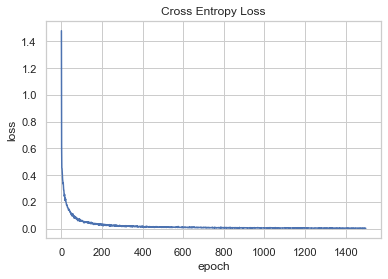

In [55]:
# Visualization of the results
# loss function
#codesegment19------------------------
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.plot(range(1500),loss_trace)

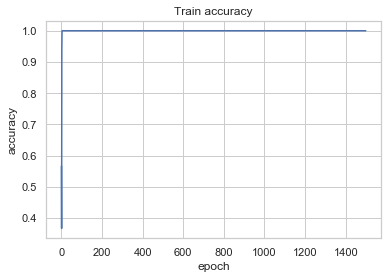

In [47]:
# plot for training accuracy
#codesegment20---------------------------
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy')

plt.plot(range(1500),train_ac)
plt.show()